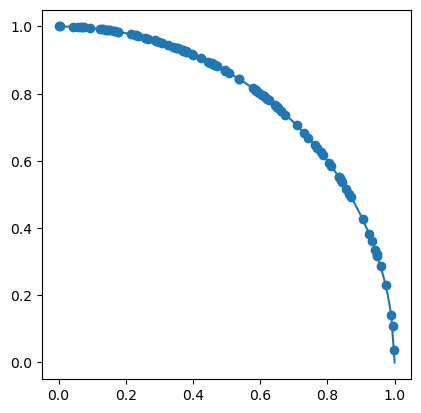

n=100, monte_calro_integral=0.781522656149606, error=4.93e-01%


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.sqrt(1.0-x**2)

answer = np.pi/4.0 # \int_0^1 func(x) dx

n = 100 # Number of samples
h = 1/n # average width
x_sample = np.random.rand(n)
y_sample = func(x_sample)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x_sample,y_sample)
wx = np.linspace(0,1,100)
ax.plot(wx,func(wx))
ax.set_aspect("equal")
plt.show()

monte_calro_integral = h*np.sum(y_sample)
print("n={:}, monte_calro_integral={:}, error={:.2e}%".format(n, monte_calro_integral, np.abs(answer-monte_calro_integral)*100/answer))

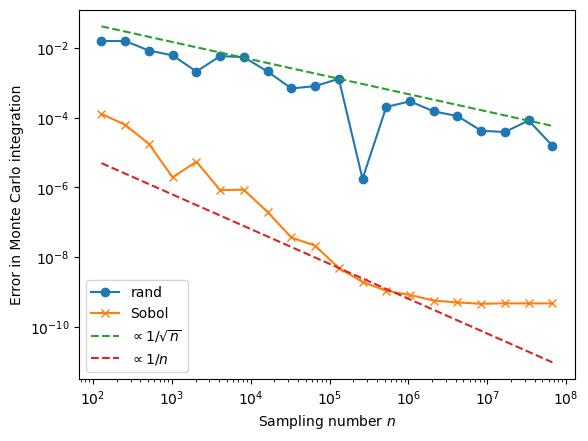

In [2]:
from scipy import stats

n_list = [128*2**i for i in range(20)]
error_rand = []
error_sobol = []
for n in n_list:
    h = 1/n # average width
    
    ### Use uniform random number
    x_sample = np.random.rand(n)
    y_sample = func(x_sample)
    monte_calro_integral = h*np.sum(y_sample)
    error_rand.append(abs(monte_calro_integral-answer))
    
    ### Use low-discrepancy, quasi-random numbers
    sobol_sampler = stats.qmc.Sobol(1)
    x_sample = sobol_sampler.random_base2(int(np.log2(n)))
    y_sample = func(x_sample)
    monte_calro_integral = h*np.sum(y_sample)
    error_sobol.append(abs(monte_calro_integral-answer))


fig = plt.figure()
ax = fig.add_subplot()
ax.plot(n_list,error_rand,"o-",label="rand")
ax.plot(n_list,error_sobol,"x-",label="Sobol")
wn = np.array(n_list)
ax.plot(wn,error_rand[10]*np.sqrt(wn[10]/wn),"--",label=r"$\propto 1/\sqrt{n}$")
ax.plot(wn,error_sobol[10]*(wn[10]/wn),"--",label=r"$\propto 1/n$")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r"Sampling number $n$")
ax.set_ylabel(r"Error in Monte Carlo integration")
ax.legend()
plt.show()